In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from bs4 import BeautifulSoup
import requests
import os
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [5]:
df_apple = pd.read_csv("AAPL_processed1.csv")
df_apple['Date'] = pd.to_datetime(df_apple['Date'])
df_apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100751,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095495,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088485,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090676,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093304,73449600


In [6]:
df_apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10218.000000,10218.000000,10218.000000,10218.000000,10218.000000,1.021800e+04
mean,11.300340,11.421450,11.175662,11.302658,10.725626,3.367509e+08
std,23.212108,23.473441,22.936529,23.214144,22.898992,3.408031e+08
min,0.049665,0.049665,0.049107,0.049107,0.038548,0.000000e+00
25%,0.276786,0.283281,0.267857,0.275402,0.232184,1.286682e+08
50%,0.450893,0.459910,0.443214,0.450893,0.375689,2.246118e+08
75%,12.342054,12.426607,12.266339,12.356964,10.625787,4.189094e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,7.421641e+09


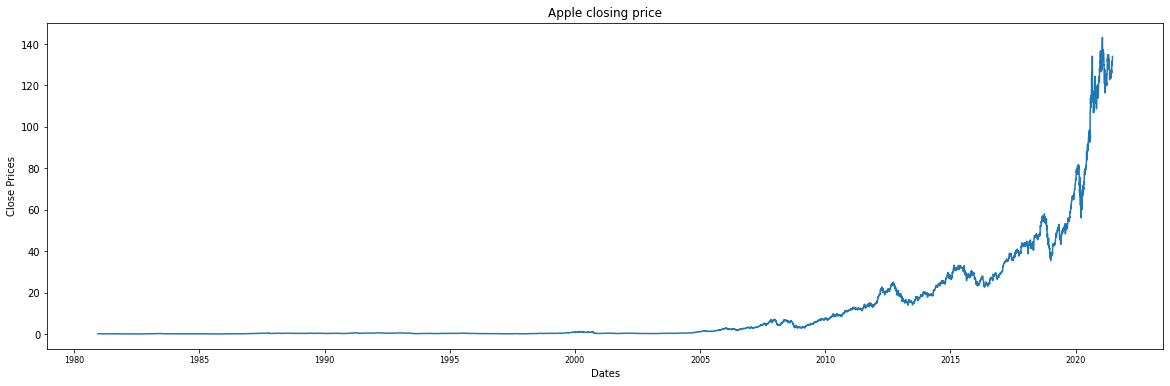

In [7]:
plt.figure(figsize=(20,6))
plt.grid(False)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df_apple["Date" ],df_apple['Close'])
plt.title('Apple closing price')
plt.xticks(fontsize= 8)
plt.show()

In [8]:
df_closing_apple = df_apple['Close']

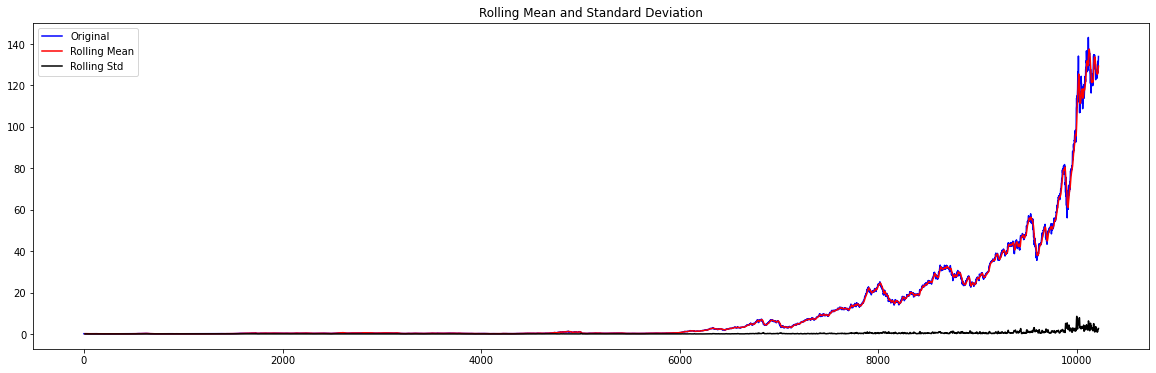

Results of dickey fuller test
Test Statistics                    5.417971
p-value                            1.000000
No. of lags used                  39.000000
Number of observations used    10178.000000
critical value (1%)               -3.430993
critical value (5%)               -2.861824
critical value (10%)              -2.566921
dtype: float64


In [9]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
   
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_closing_apple)

In [10]:
# reading google
df_google = pd.read_csv("GOOG_processed1.csv")
df_google['Date'] = pd.to_datetime(df_google['Date'])
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [11]:
def plotting_1(data, title):
  plt.figure(figsize=(20,6))
  plt.grid(False)
  plt.xlabel('Dates')
  plt.ylabel('Close Prices')
  plt.plot(data["Date" ],data['Close'])
  plt.title(title)
  plt.show()

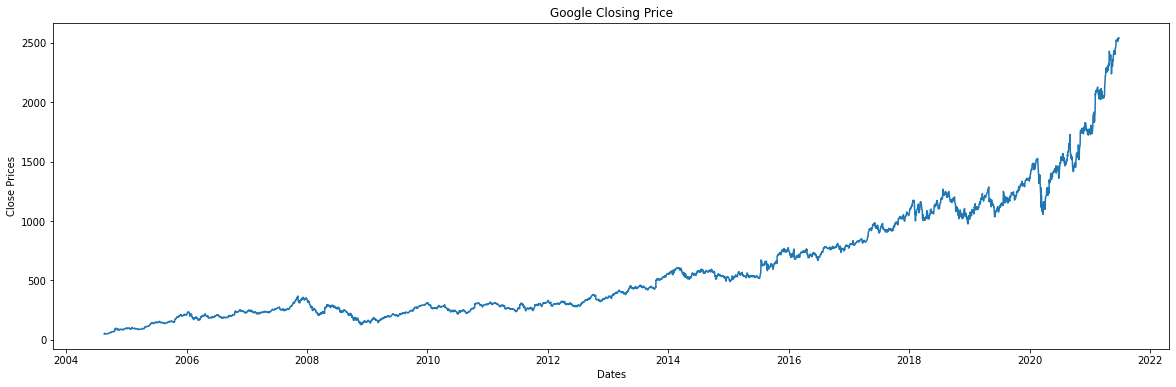

In [12]:
plotting_1(df_google, "Google Closing Price")

In [13]:
df_closing_google = df_google["Close"]

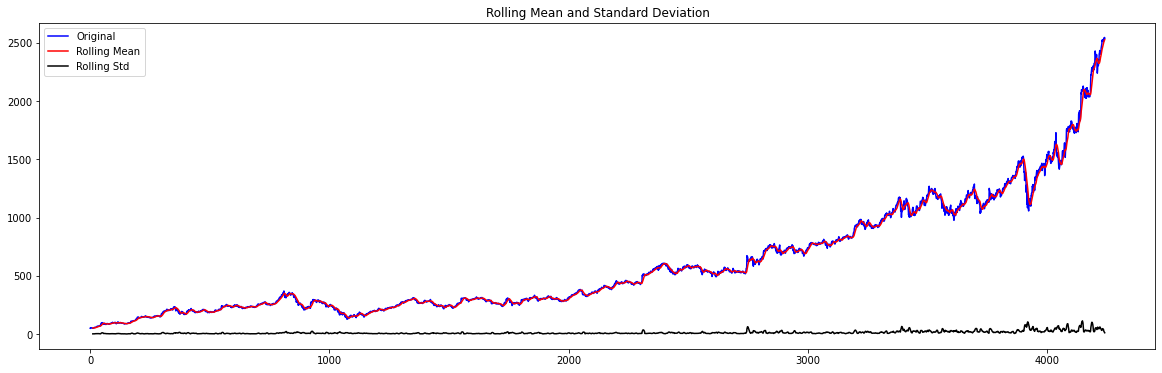

Results of dickey fuller test
Test Statistics                   4.423959
p-value                           1.000000
No. of lags used                 31.000000
Number of observations used    4211.000000
critical value (1%)              -3.431904
critical value (5%)              -2.862227
critical value (10%)             -2.567135
dtype: float64


In [14]:
test_stationarity(df_closing_google)

In [15]:
df_disney = pd.read_csv("DIS.csv")
df_disney.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.092908,0.096026,0.092908,0.092908,0.058398,841958
1,1962-01-03,0.092908,0.094467,0.092908,0.094155,0.059182,801865
2,1962-01-04,0.094155,0.094467,0.093532,0.094155,0.059182,962238
3,1962-01-05,0.094155,0.094779,0.093844,0.094467,0.059378,962238
4,1962-01-08,0.094467,0.095714,0.092285,0.094155,0.059182,1282984


In [16]:
df_disney['Date'] = pd.to_datetime(df_disney['Date'])

In [17]:
df_disney.to_csv("DIS_processed1.csv")

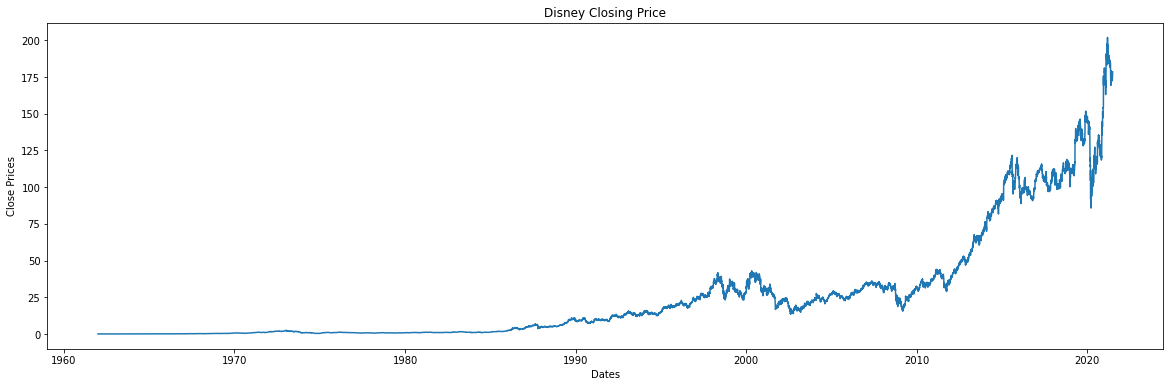

In [18]:
plotting_1(df_disney, "Disney Closing Price")

In [19]:
df_closing_disney = df_disney["Close"]

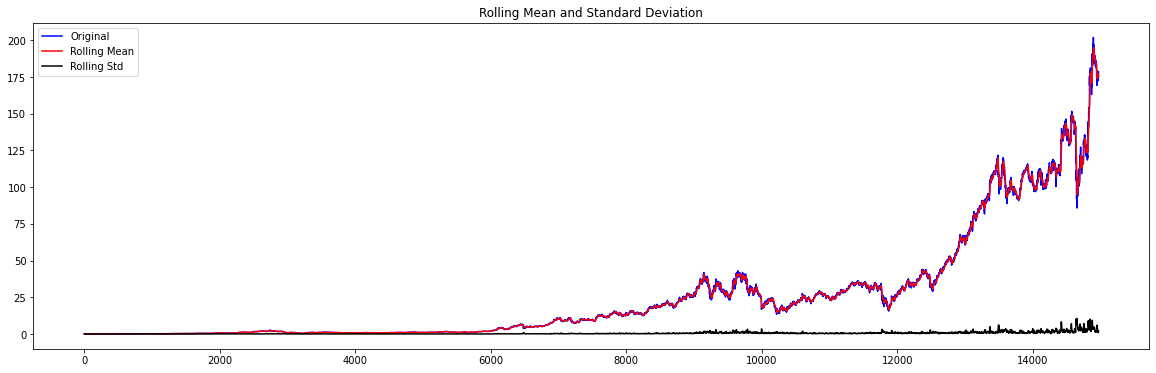

Results of dickey fuller test
Test Statistics                    2.010584
p-value                            0.998687
No. of lags used                  42.000000
Number of observations used    14931.000000
critical value (1%)               -3.430788
critical value (5%)               -2.861734
critical value (10%)              -2.566873
dtype: float64


In [20]:
test_stationarity(df_closing_disney)

In [21]:
df_microsoft = pd.read_csv("MSFT.csv")
df_microsoft.head()
print(df_microsoft.describe())
print(df_microsoft.isnull().sum())
df_microsoft['Date'] = pd.to_datetime(df_microsoft['Date'])
df_microsoft.to_csv("MSFT_processed1.csv")

              Open         High          Low        Close    Adj Close  \
count  8895.000000  8895.000000  8895.000000  8895.000000  8895.000000   
mean     35.759181    36.143955    35.371781    35.769447    30.766995   
std      46.194483    46.656073    45.728200    46.217264    46.327213   
min       0.088542     0.092014     0.088542     0.090278     0.057208   
25%       3.871094     3.916016     3.833984     3.871094     2.453063   
50%      26.625000    26.910000    26.340000    26.610001    18.731800   
75%      37.245001    37.599998    36.678749    37.201563    27.498417   
max     266.230011   267.850006   265.470001   266.690002   266.690002   

             Volume  
count  8.895000e+03  
mean   5.938352e+07  
std    3.856866e+07  
min    2.304000e+06  
25%    3.540120e+07  
50%    5.260230e+07  
75%    7.327175e+07  
max    1.031789e+09  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


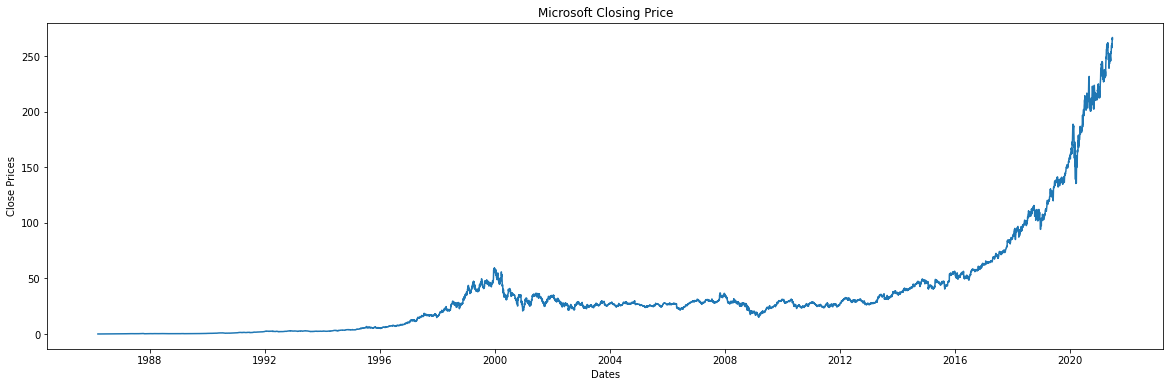

In [22]:
plotting_1(df_microsoft, "Microsoft Closing Price")

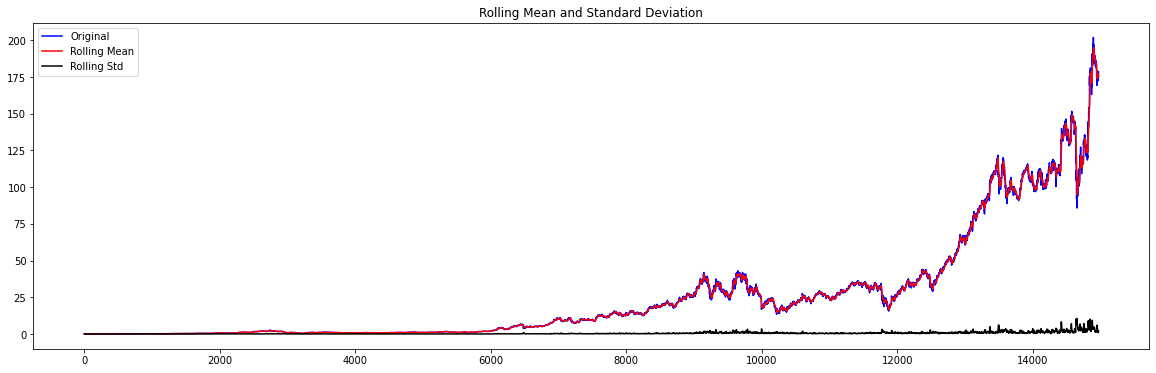

Results of dickey fuller test
Test Statistics                    2.010584
p-value                            0.998687
No. of lags used                  42.000000
Number of observations used    14931.000000
critical value (1%)               -3.430788
critical value (5%)               -2.861734
critical value (10%)              -2.566873
dtype: float64


In [23]:
df_closing_microsoft = df_microsoft["Close"]
test_stationarity(df_closing_disney)

In [24]:
df_dell = pd.read_csv("DELL.csv")
df_dell.head()
print(df_dell.describe())
print(df_dell.isnull().sum())
df_dell['Date'] = pd.to_datetime(df_dell['Date'])
df_dell.to_csv("DELL_processed1.csv")

              Open         High          Low        Close    Adj Close  \
count  1223.000000  1223.000000  1223.000000  1223.000000  1223.000000   
mean     51.356399    51.977937    50.718305    51.373585    51.373585   
std      17.023809    17.164241    16.852170    17.029302    17.029302   
min      23.643412    24.086378    23.266888    23.671097    23.671097   
25%      39.700996    40.517719    39.025470    39.742525    39.742525   
50%      49.500000    50.080002    48.790001    49.459999    49.459999   
75%      58.120155    58.687708    57.290641    57.898672    57.898672   
max     104.209999   104.620003   103.480003   103.980003   103.980003   

             Volume  
count  1.223000e+03  
mean   3.024094e+06  
std    3.781666e+06  
min    1.132360e+05  
25%    1.636024e+06  
50%    2.295800e+06  
75%    3.213046e+06  
max    7.496562e+07  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


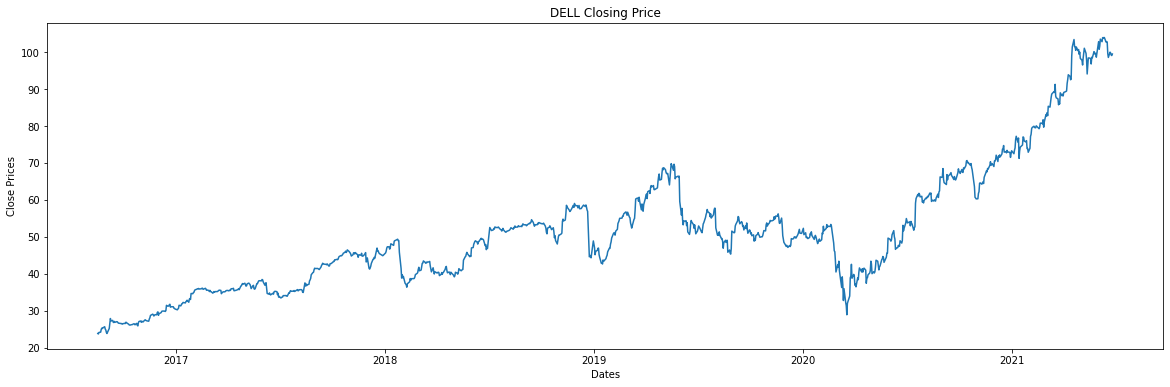

In [25]:
plotting_1(df_dell, "DELL Closing Price")

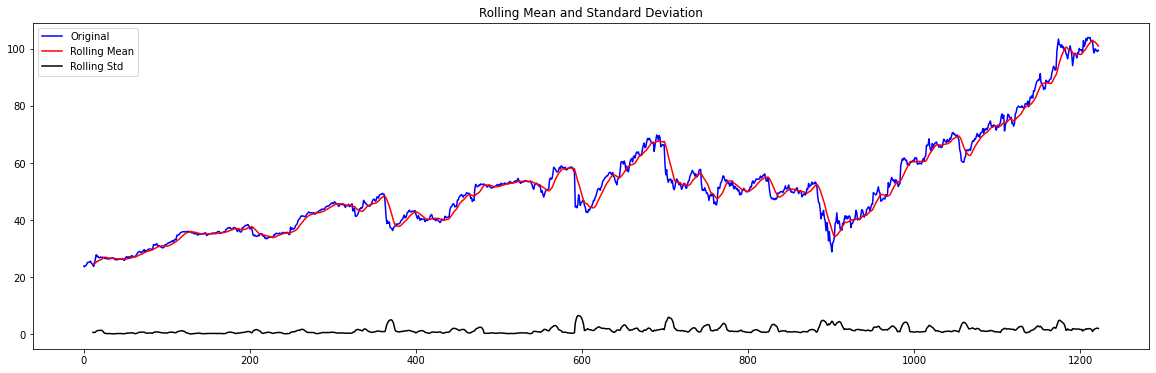

Results of dickey fuller test
Test Statistics                  -0.219535
p-value                           0.936153
No. of lags used                  2.000000
Number of observations used    1220.000000
critical value (1%)              -3.435721
critical value (5%)              -2.863912
critical value (10%)             -2.568033
dtype: float64


In [26]:
df_closing_dell = df_dell["Close"]
test_stationarity(df_closing_dell)

In [27]:
df_gold = pd.read_csv("GC=F.csv")
df_gold.head()
print(df_gold.describe())
print(df_gold.isnull().sum())
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold.to_csv("GOLD_processed1.csv")

              Open         High          Low        Close    Adj Close  \
count  5191.000000  5191.000000  5191.000000  5191.000000  5191.000000   
mean   1016.579002  1021.716298  1011.021942  1016.435947  1016.435947   
std     489.309009   492.272125   485.944792   489.164715   489.164715   
min     255.000000   256.100006   255.000000   255.100006   255.100006   
25%     477.149994   478.399994   476.750000   477.699997   477.699997   
50%    1172.699951  1177.800049  1166.400024  1172.599976  1172.599976   
75%    1333.149964  1340.450012  1326.000000  1333.400024  1333.400024   
max    2045.500000  2063.000000  2040.000000  2051.500000  2051.500000   

              Volume  
count    5191.000000  
mean     4268.031978  
std     24568.524415  
min         0.000000  
25%        17.000000  
50%        94.000000  
75%       357.500000  
max    386334.000000  
Date           0
Open         112
High         112
Low          112
Close        112
Adj Close    112
Volume       112
dtype: 

In [28]:
df_gold.shape

(5303, 7)

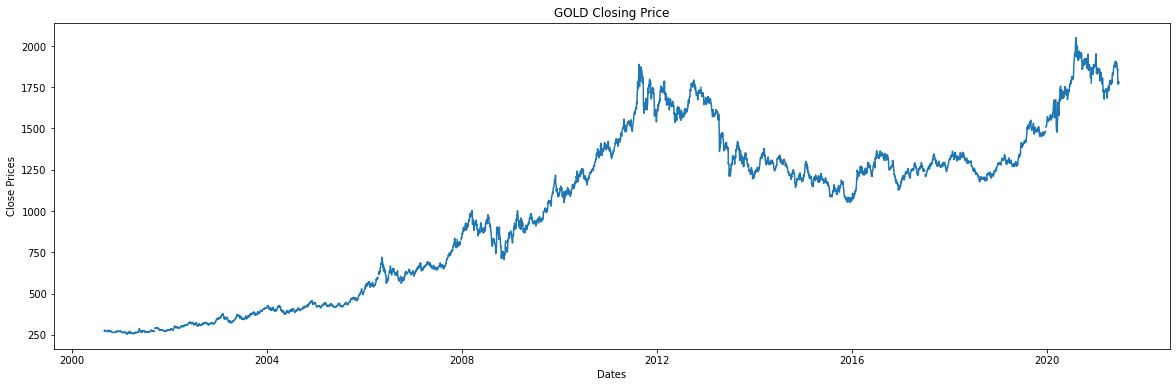

In [29]:
plotting_1(df_gold, "GOLD Closing Price")

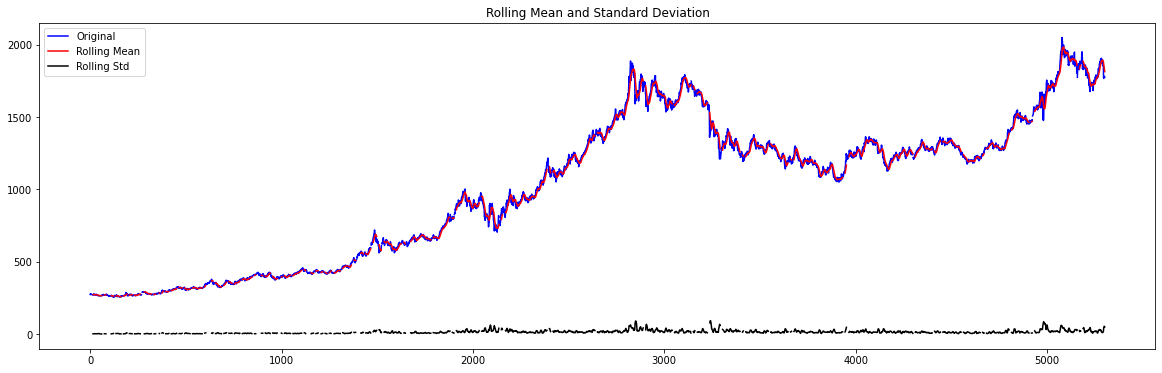

Results of dickey fuller test


MissingDataError: exog contains inf or nans

In [30]:
df_closing_gold = df_gold["Close"]
test_stationarity(df_closing_gold)

In [34]:
df_samsung = pd.read_csv("005930.KS.csv")
df_samsung.head()
print(df_samsung.describe())
print(df_samsung.isnull().sum())
df_samsung['Date'] = pd.to_datetime(df_samsung['Date'])
df_samsung.to_csv("SAMSUNG_processed1.csv")

               Open          High           Low         Close     Adj Close  \
count   5394.000000   5394.000000   5394.000000   5394.000000   5394.000000   
mean   22855.333704  23097.565814  22612.660363  22855.448647  19976.255426   
std    17814.624512  17984.763802  17651.179358  17812.039334  17412.698160   
min     2540.000000   2760.000000   2420.000000   2730.000000   2117.926025   
25%     9892.500000  10000.000000   9800.000000   9900.000000   7728.877808   
50%    15800.000000  15940.000000  15600.000000  15810.000000  12825.604492   
75%    29320.000000  29580.000000  29070.000000  29300.000000  24583.120117   
max    90300.000000  96800.000000  89500.000000  91000.000000  90597.414063   

             Volume  
count  5.394000e+03  
mean   2.207162e+07  
std    1.563503e+07  
min    0.000000e+00  
25%    1.185518e+07  
50%    1.803800e+07  
75%    2.770875e+07  
max    1.642150e+08  
Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6


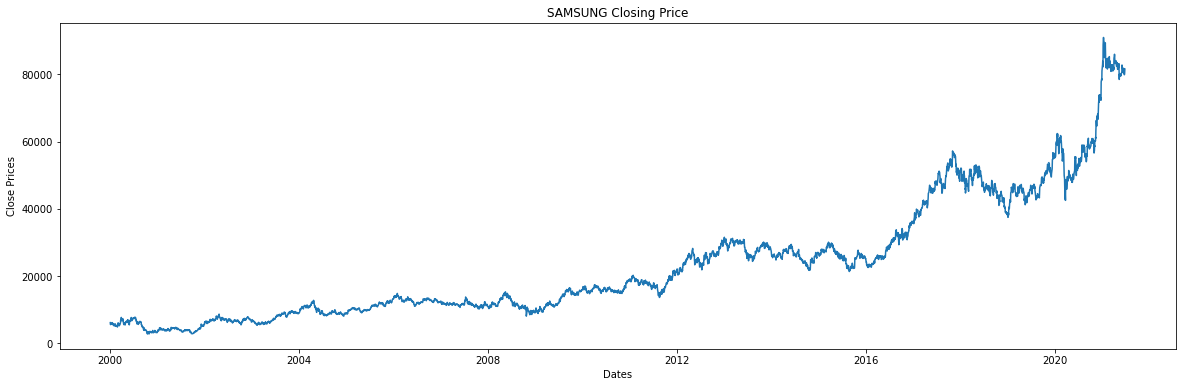

In [35]:
plotting_1(df_samsung, "SAMSUNG Closing Price")

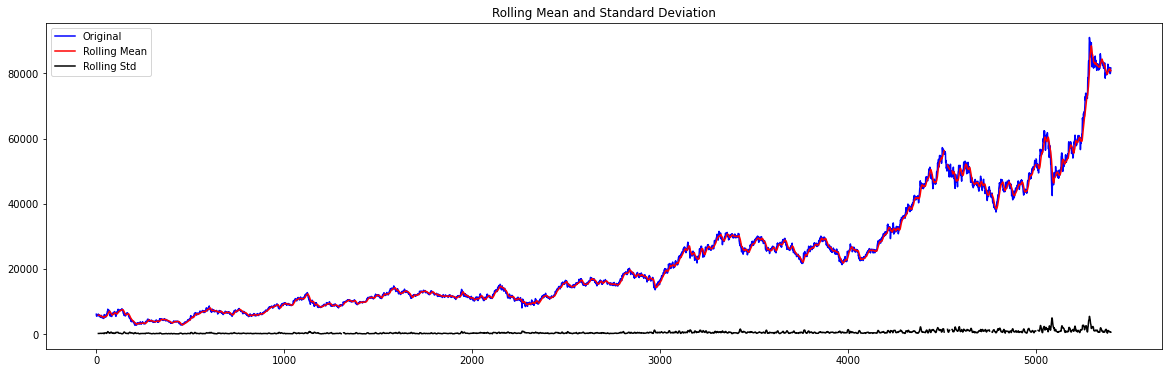

Results of dickey fuller test


MissingDataError: exog contains inf or nans

In [36]:
df_closing_samsung = df_samsung["Close"]
test_stationarity(df_closing_samsung)

In [37]:
# subsetting data sets to match data available for all the companies in the study
def sub_data(data):
  year1 = []
  a = 0
  for a in range(len(data)):
    year1.append(data.Date[a].year)
    a = a + 1
  data["year"] = year1
  data_f = data[data["year"] > 2013]
  return data_f

In [38]:
df_google = sub_data(df_google)
df_disney = sub_data(df_disney)
df_gold = sub_data(df_gold)
df_microsoft = sub_data(df_microsoft)
df_apple = sub_data(df_apple)


In [39]:
df_samsung = sub_data(df_samsung)

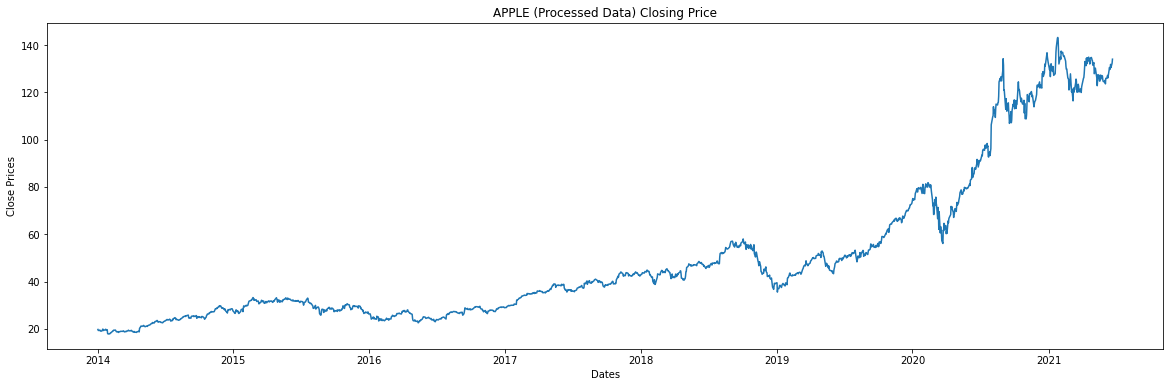

In [40]:
plotting_1(df_apple, "APPLE (Processed Data) Closing Price")

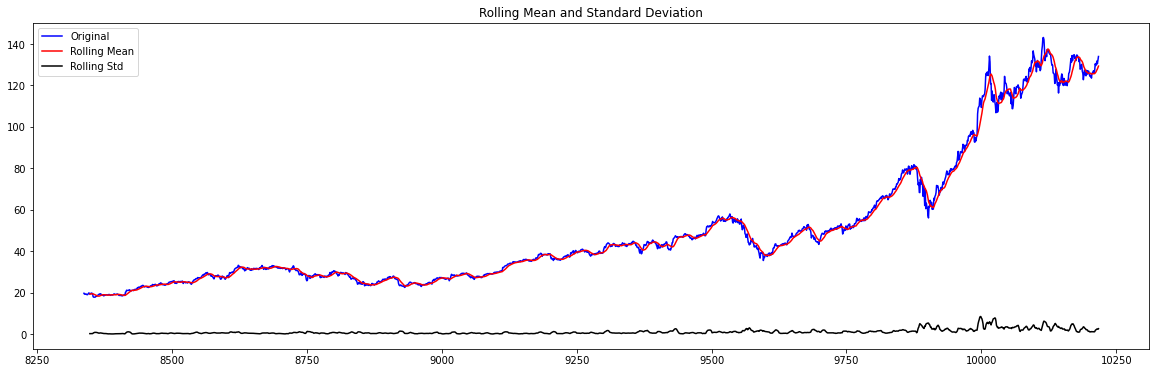

Results of dickey fuller test
Test Statistics                   1.256536
p-value                           0.996354
No. of lags used                 24.000000
Number of observations used    1856.000000
critical value (1%)              -3.433878
critical value (5%)              -2.863099
critical value (10%)             -2.567600
dtype: float64


In [41]:
df_closing_apple = df_apple["Close"]
test_stationarity(df_closing_apple)

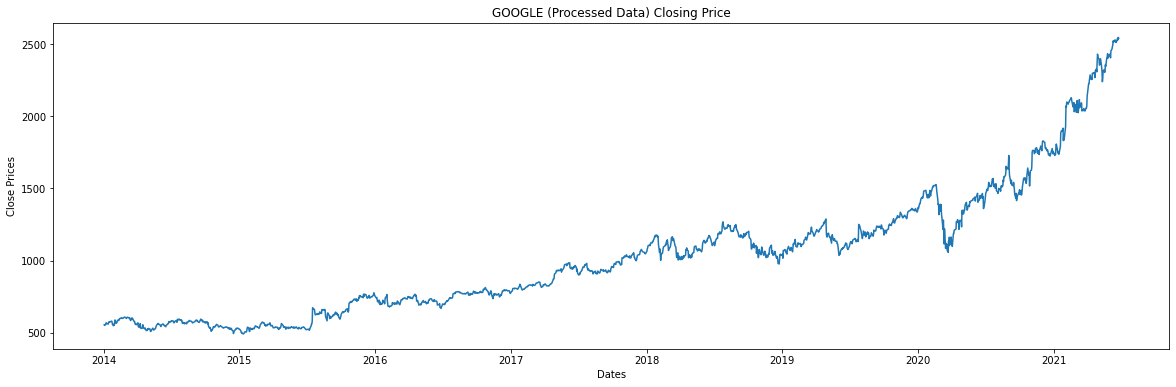

In [42]:
plotting_1(df_google, "GOOGLE (Processed Data) Closing Price")

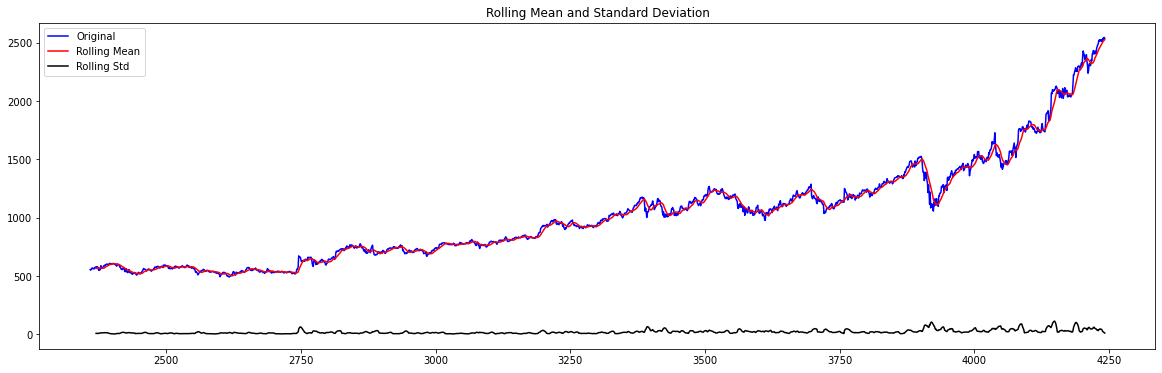

Results of dickey fuller test
Test Statistics                   2.917847
p-value                           1.000000
No. of lags used                 26.000000
Number of observations used    1857.000000
critical value (1%)              -3.433876
critical value (5%)              -2.863098
critical value (10%)             -2.567599
dtype: float64


In [43]:
df_closing_google = df_google["Close"]
test_stationarity(df_closing_google)

<Figure size 432x288 with 0 Axes>

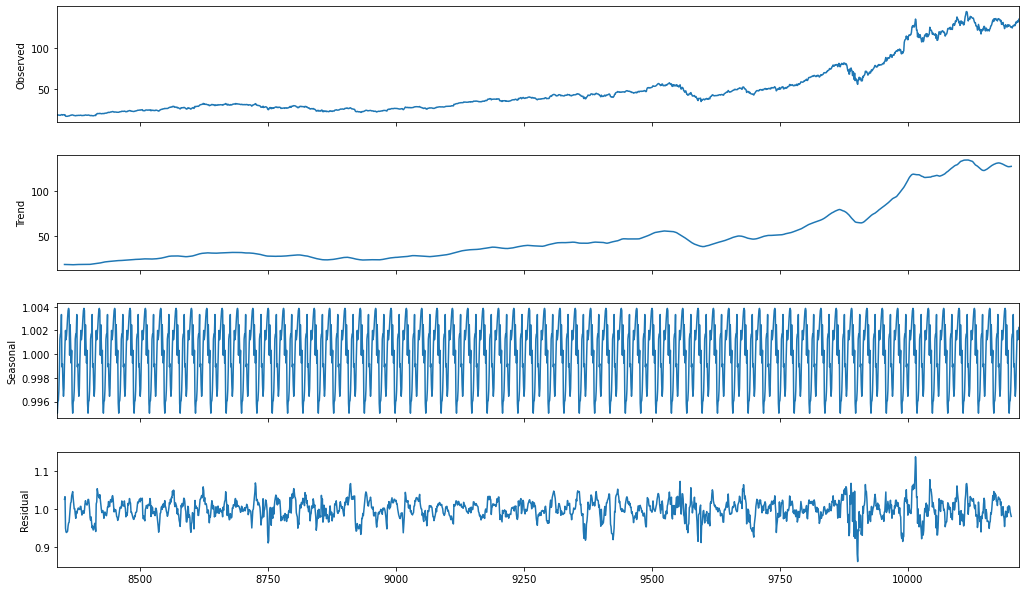

In [44]:
result = seasonal_decompose(df_closing_apple, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [45]:
df_oil = pd.read_csv("Macrotrends-crude-oil-prices-daily.csv")
df_oil.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [46]:
df_oil.shape
df_oil.columns = ['Date', 'Close']
print(df_oil.describe())
print(df_oil.isnull().sum())
df_oil['Date'] = pd.to_datetime(df_oil['Date'])
df_oil.to_csv("OIL_processed1.csv")

             Close
count  8932.000000
mean     44.241742
std      28.740187
min      10.250000
25%      19.840000
50%      32.465000
75%      62.972500
max     145.310000
Date     0
Close    0
dtype: int64


In [47]:
df_oil = sub_data(df_oil)

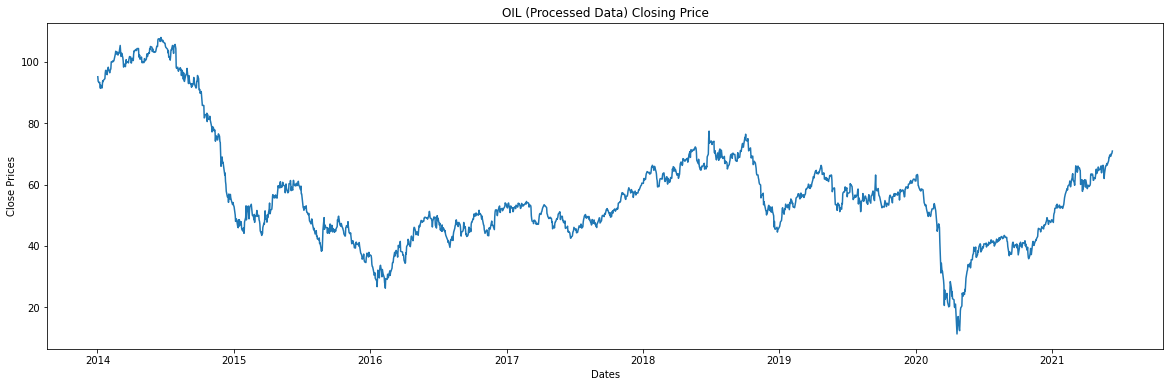

In [48]:
plotting_1(df_oil, "OIL (Processed Data) Closing Price")

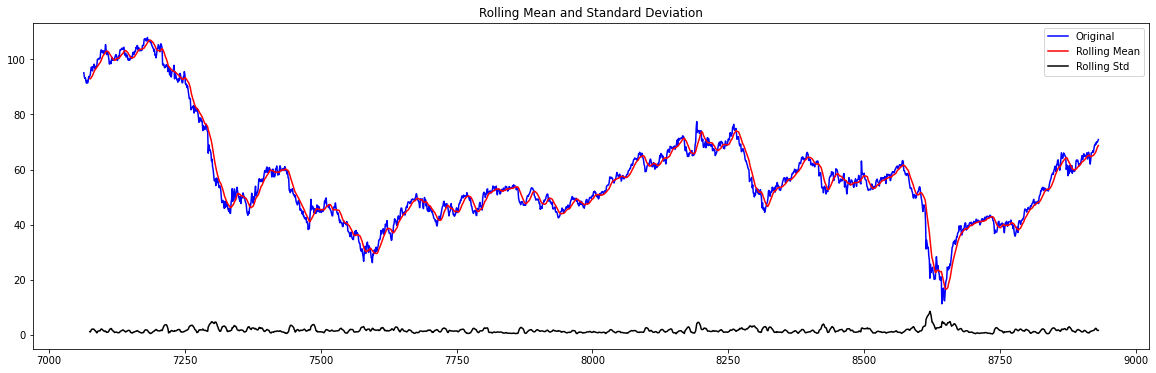

Results of dickey fuller test
Test Statistics                  -2.269789
p-value                           0.181897
No. of lags used                  9.000000
Number of observations used    1858.000000
critical value (1%)              -3.433874
critical value (5%)              -2.863097
critical value (10%)             -2.567599
dtype: float64


In [49]:
df_closing_oil = df_oil["Close"]
test_stationarity(df_closing_oil)

In [50]:
df_apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year'], dtype='object')

In [51]:
df_apple = df_apple.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis = 1)

In [52]:
df_google = df_google.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_disney = df_disney.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_gold = df_gold.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_microsoft = df_microsoft.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)
df_samsung = df_samsung.drop(['Open', 'High', 'Low','Adj Close', 'Volume', 'year'], axis = 1)

In [53]:
df_dell = df_dell.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis = 1)

In [54]:
df_dell.columns = ["Date", "Close_dell"]

In [55]:
df_apple.columns = ["Date", "Close_apple", "Year"]

In [56]:
df_oil = df_oil.drop(['year'], axis = 1)

In [57]:
df_google.columns = ["Date", "Close_google"]
df_disney.columns = ["Date", "Close_disney"]
df_gold.columns = ["Date", "Close_gold"]
df_microsoft.columns = ["Date", "Close_microsoft"]
df_samsung.columns = ["Date", "Close_samsung"]
df_oil.columns = ["Date", "Close_Oil"]

In [58]:
df_f1 = pd.merge(df_apple, df_google, how ="outer", on = "Date")

In [59]:
df_f1.head()

,Date,Close_apple,Year,Close_google
0,2014-01-02,19.754642,2014.0,554.481689
1,2014-01-03,19.320715,2014.0,550.436829
2,2014-01-06,19.426071,2014.0,556.573853
3,2014-01-07,19.287144,2014.0,567.303589
4,2014-01-08,19.409286,2014.0,568.484192


In [60]:
df_f = pd.merge(df_f1, df_disney, how = "outer", on = "Date")

In [61]:
first_column = df_f.pop('Year')

df_f.insert(0, 'Year', first_column)

In [62]:
df_f = pd.merge(df_f, df_dell, how = "outer", on = "Date")

In [63]:
df_f = pd.merge(df_f, df_microsoft, how = "outer", on="Date")

In [64]:
df_f = pd.merge(df_f, df_samsung, how = "outer", on="Date")

In [65]:
df_f = pd.merge(df_f, df_oil, how = "outer", on="Date")

In [66]:
df_f = pd.merge(df_f, df_gold, how = "outer", on="Date")

In [67]:
df_f.head()

,Year,Date,Close_apple,Close_google,Close_disney,Close_dell,Close_microsoft,Close_samsung,Close_Oil,Close_gold
0,2014.0,2014-01-02,19.754642,554.481689,76.269997,NaN,37.160000,26180.0,95.14,1225.000000
1,2014.0,2014-01-03,19.320715,550.436829,76.110001,NaN,36.910000,25920.0,93.66,1238.400024
2,2014.0,2014-01-06,19.426071,556.573853,75.820000,NaN,36.130001,26140.0,93.12,1237.800049
3,2014.0,2014-01-07,19.287144,567.303589,76.339996,NaN,36.410000,26080.0,93.31,1229.400024
4,2014.0,2014-01-08,19.409286,568.484192,75.220001,NaN,35.759998,25820.0,91.90,1225.300049


In [68]:
df_f.isnull().sum()

Year                58
Date                 0
Close_apple         58
Close_google        55
Close_disney        55
Close_dell         716
Close_microsoft     55
Close_samsung      105
Close_Oil           71
Close_gold          71
dtype: int64

In [69]:
df_f.drop(columns = ["Close_dell"], inplace=True)

In [70]:
df_f.isnull().sum()

Year                58
Date                 0
Close_apple         58
Close_google        55
Close_disney        55
Close_microsoft     55
Close_samsung      105
Close_Oil           71
Close_gold          71
dtype: int64

In [71]:
year1 = []
a = 0
for a in range(len(df_f)):
  year1.append(df_f.Date[a].year)
  a = a + 1


In [72]:
df_f["Year"] = year1

In [73]:
df_final = df_f.bfill().ffill()


In [74]:
df_final.isnull().sum()

Year               0
Date               0
Close_apple        0
Close_google       0
Close_disney       0
Close_microsoft    0
Close_samsung      0
Close_Oil          0
Close_gold         0
dtype: int64

IndexError: list index out of range

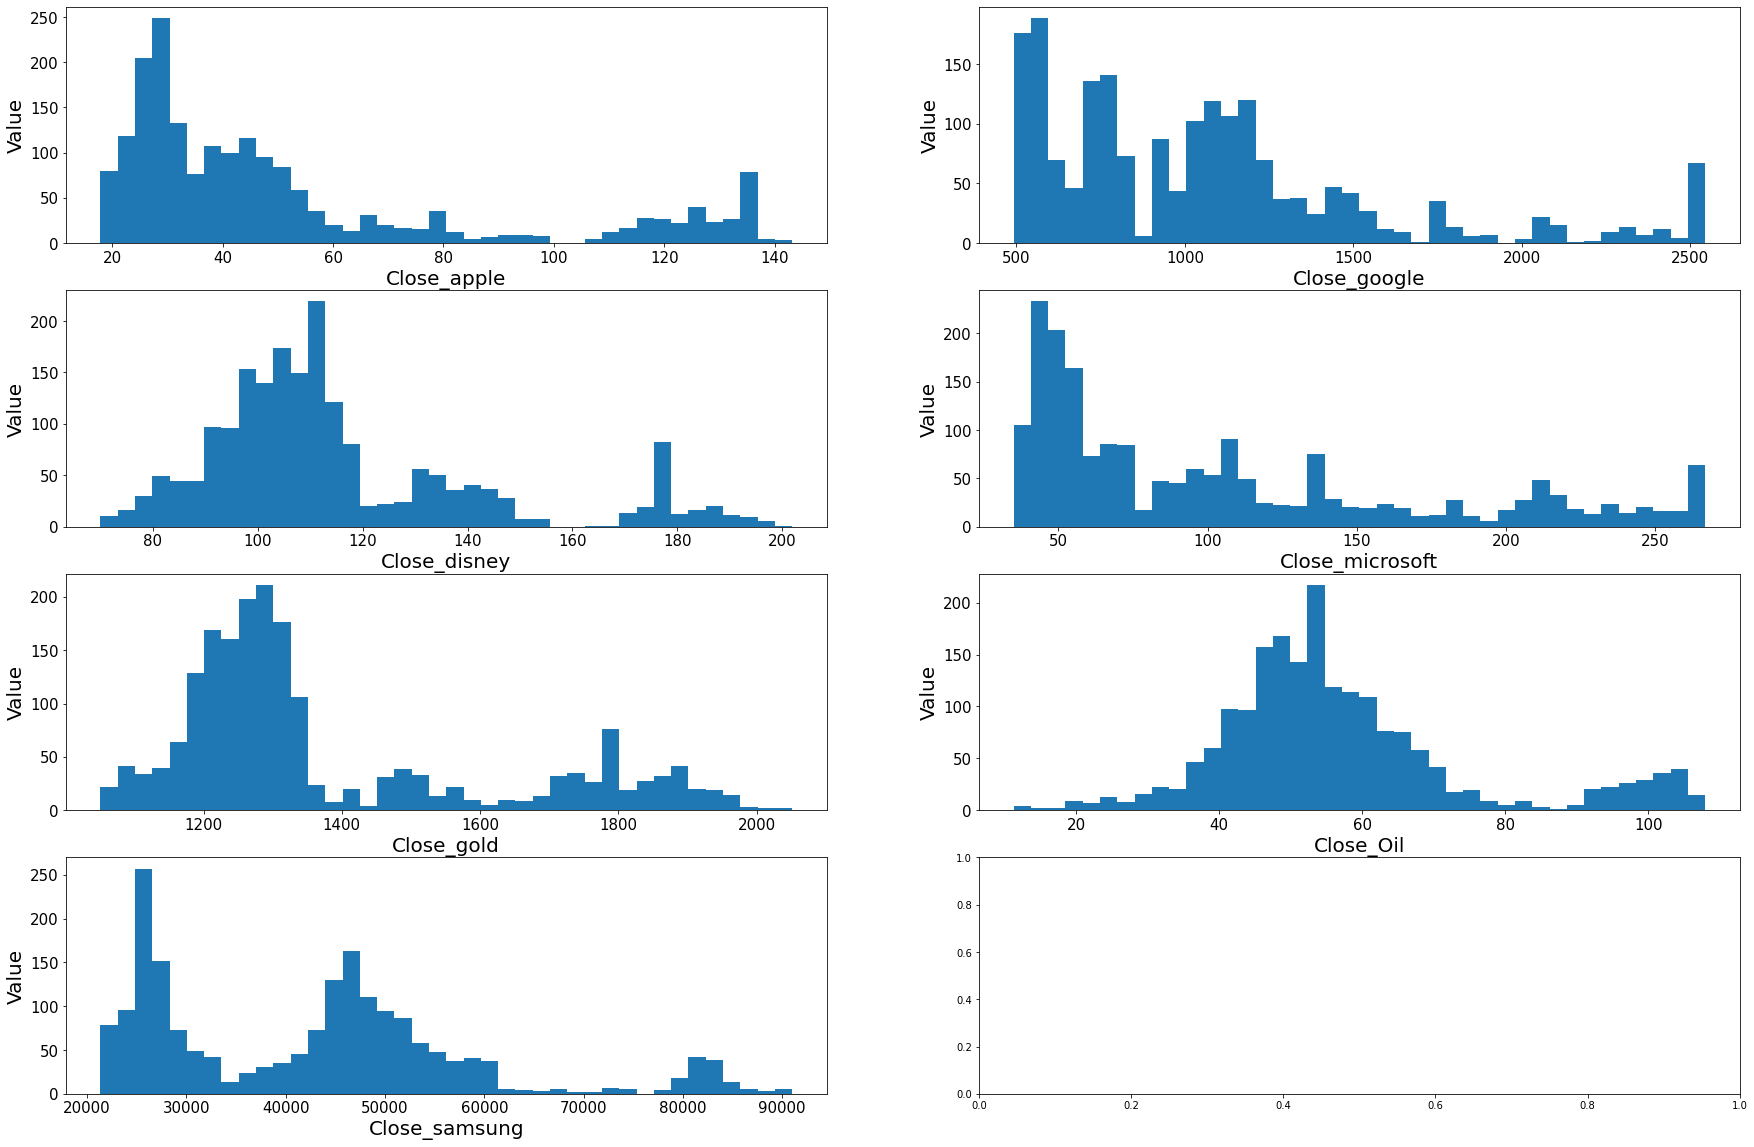

In [75]:
plt.rcParams['figure.figsize'] = (30, 20)

fig, axes = plt.subplots(nrows = 4, ncols = 2)

# Specify the features of interest
num_features = ['Close_apple', 'Close_google', 'Close_disney', 'Close_microsoft', 'Close_gold', 'Close_Oil', 'Close_samsung']
xaxes = num_features
yaxes = ['Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value', 'Value']


# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_final[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

plt.show()

In [76]:
import seaborn as sns

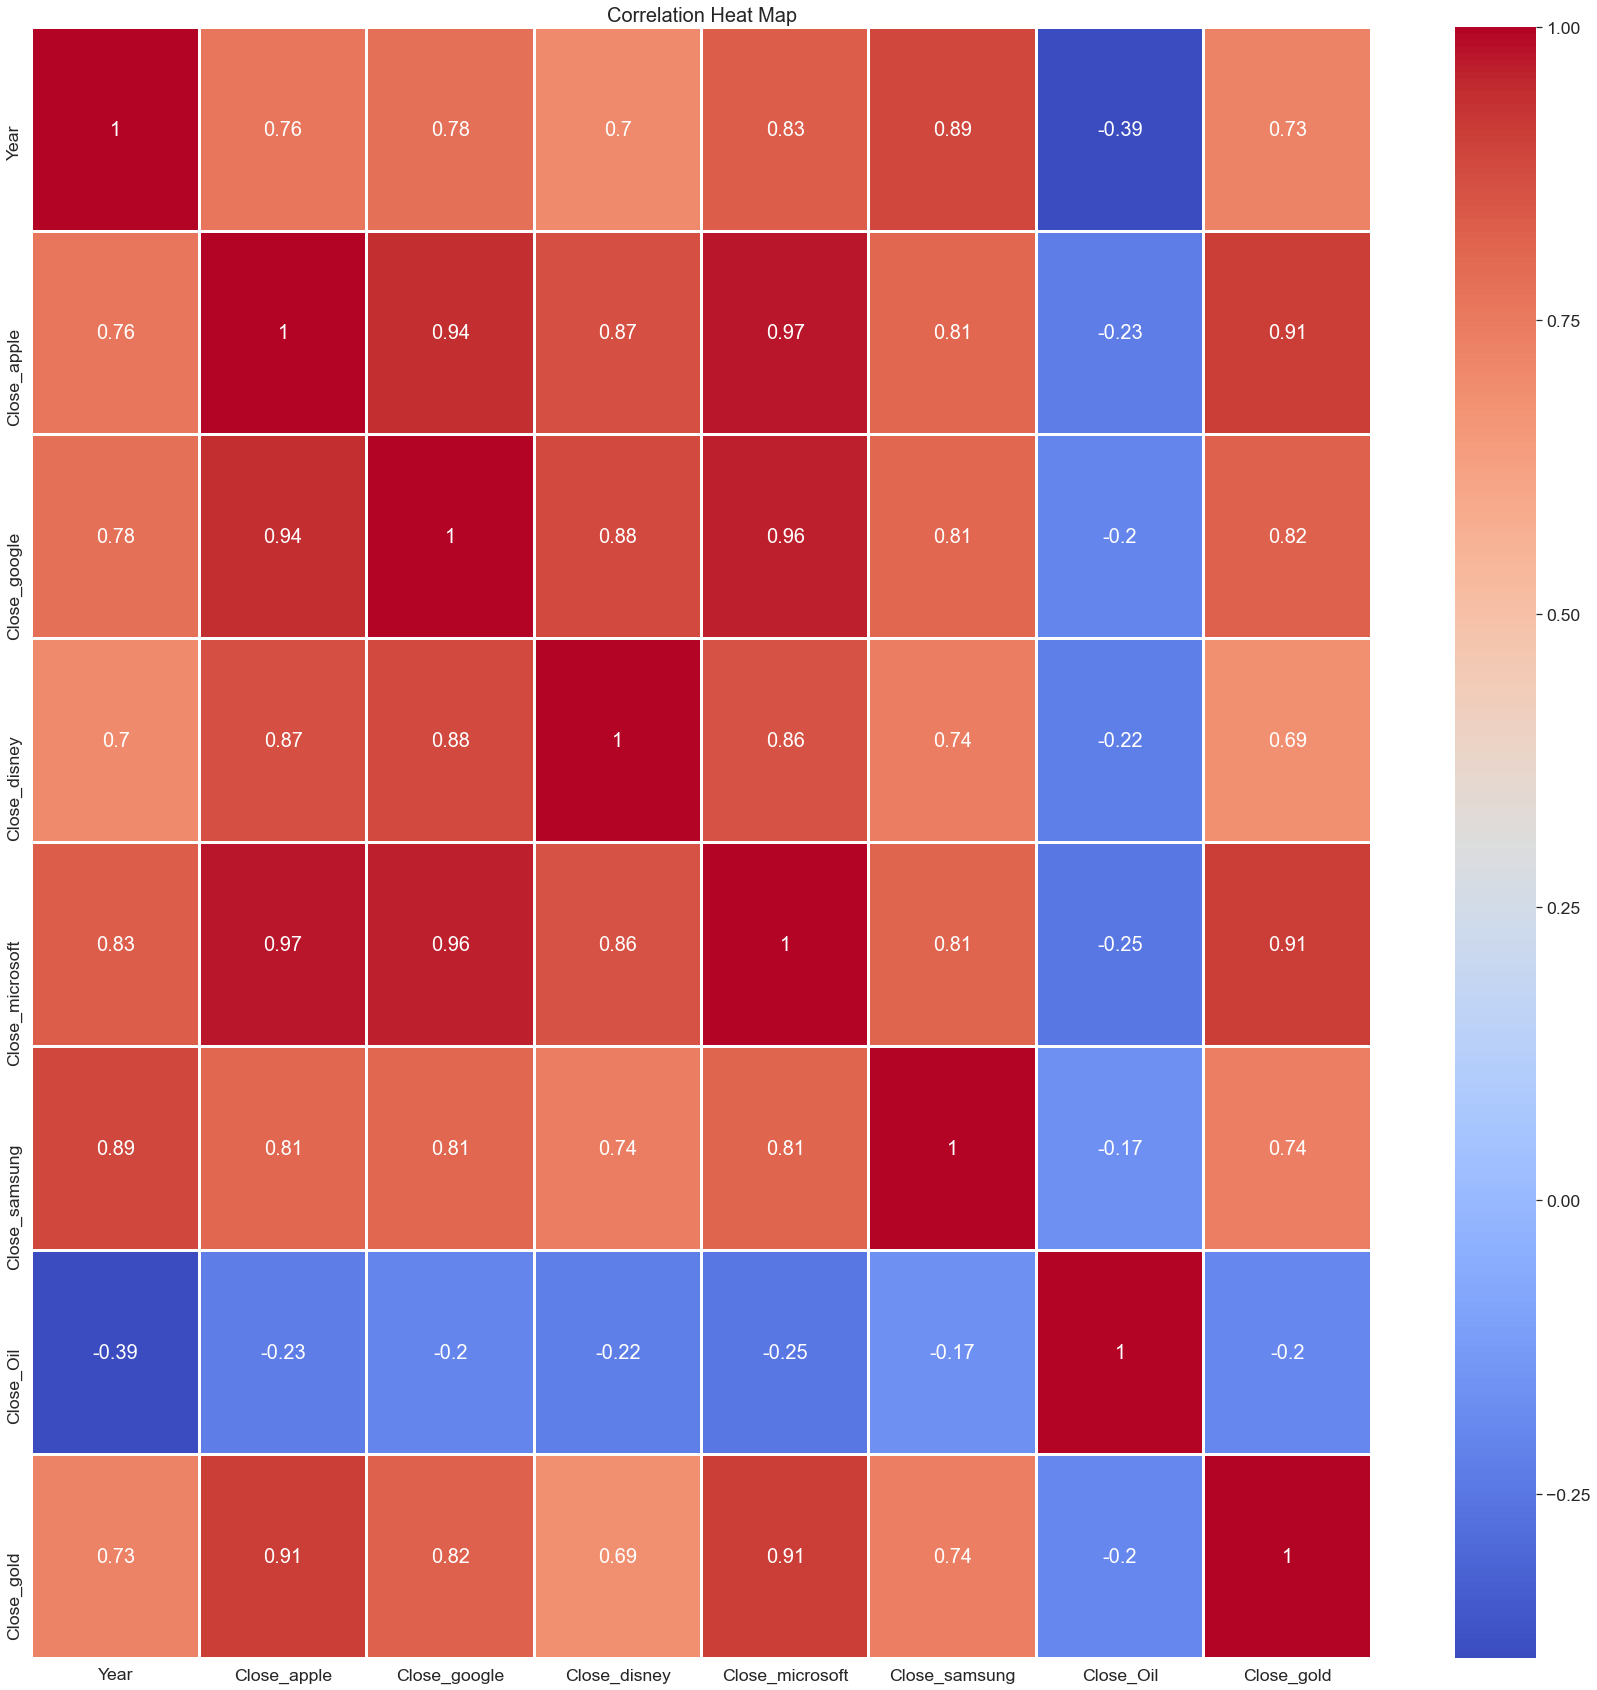

In [78]:

sns.set(font_scale=1.6)
fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
sns.heatmap(df_final.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2, annot_kws={"size": 20})
plt.title('Correlation Heat Map', fontsize = 20)
plt.show()

In [79]:
df_final.Close_apple.describe()

count    1939.000000
mean       52.332951
std        34.255363
min        17.849285
25%        28.092500
50%        39.884998
75%        57.421250
max       143.160004
Name: Close_apple, dtype: float64

In [80]:
df_final['rolling_mean'] = df_final['Close_apple'].rolling(12).mean()

In [81]:
df_final["rolling_mean"]=df_final.rolling_mean.bfill().ffill()

In [82]:
df_final["rolling_mean"].describe()

count    1939.000000
mean       52.008065
std        33.985031
min        18.344047
25%        27.925209
50%        39.767292
75%        56.320937
max       137.532501
Name: rolling_mean, dtype: float64

In [83]:
param1 = 56.33

In [85]:
df_final['Buy'] = df_final['Close_apple'].apply(lambda c: 0 if c > param1 else 1)



In [86]:
df_final

,Year,Date,Close_apple,Close_google,Close_disney,Close_microsoft,Close_samsung,Close_Oil,Close_gold,rolling_mean,Buy
0,2014,2014-01-02,19.754642,554.481689,76.269997,37.160000,26180.0,95.14,1225.000000,19.420833,1
1,2014,2014-01-03,19.320715,550.436829,76.110001,36.910000,25920.0,93.66,1238.400024,19.420833,1
2,2014,2014-01-06,19.426071,556.573853,75.820000,36.130001,26140.0,93.12,1237.800049,19.420833,1
3,2014,2014-01-07,19.287144,567.303589,76.339996,36.410000,26080.0,93.31,1229.400024,19.420833,1
4,2014,2014-01-08,19.409286,568.484192,75.220001,35.759998,25820.0,91.90,1225.300049,19.420833,1
...,...,...,...,...,...,...,...,...,...,...,...
1934,2020,2020-11-26,133.979996,2539.899902,178.350006,265.019989,68000.0,52.64,1776.599976,133.979996,0
1935,2021,2021-01-18,133.979996,2539.899902,178.350006,265.019989,85000.0,52.64,1776.599976,133.979996,0
1936,2021,2021-02-15,133.979996,2539.899902,178.350006,265.019989,84200.0,52.64,1776.599976,133.979996,0
1937,2021,2021-04-02,133.979996,2539.899902,178.350006,265.019989,84800.0,52.64,1776.599976,133.979996,0


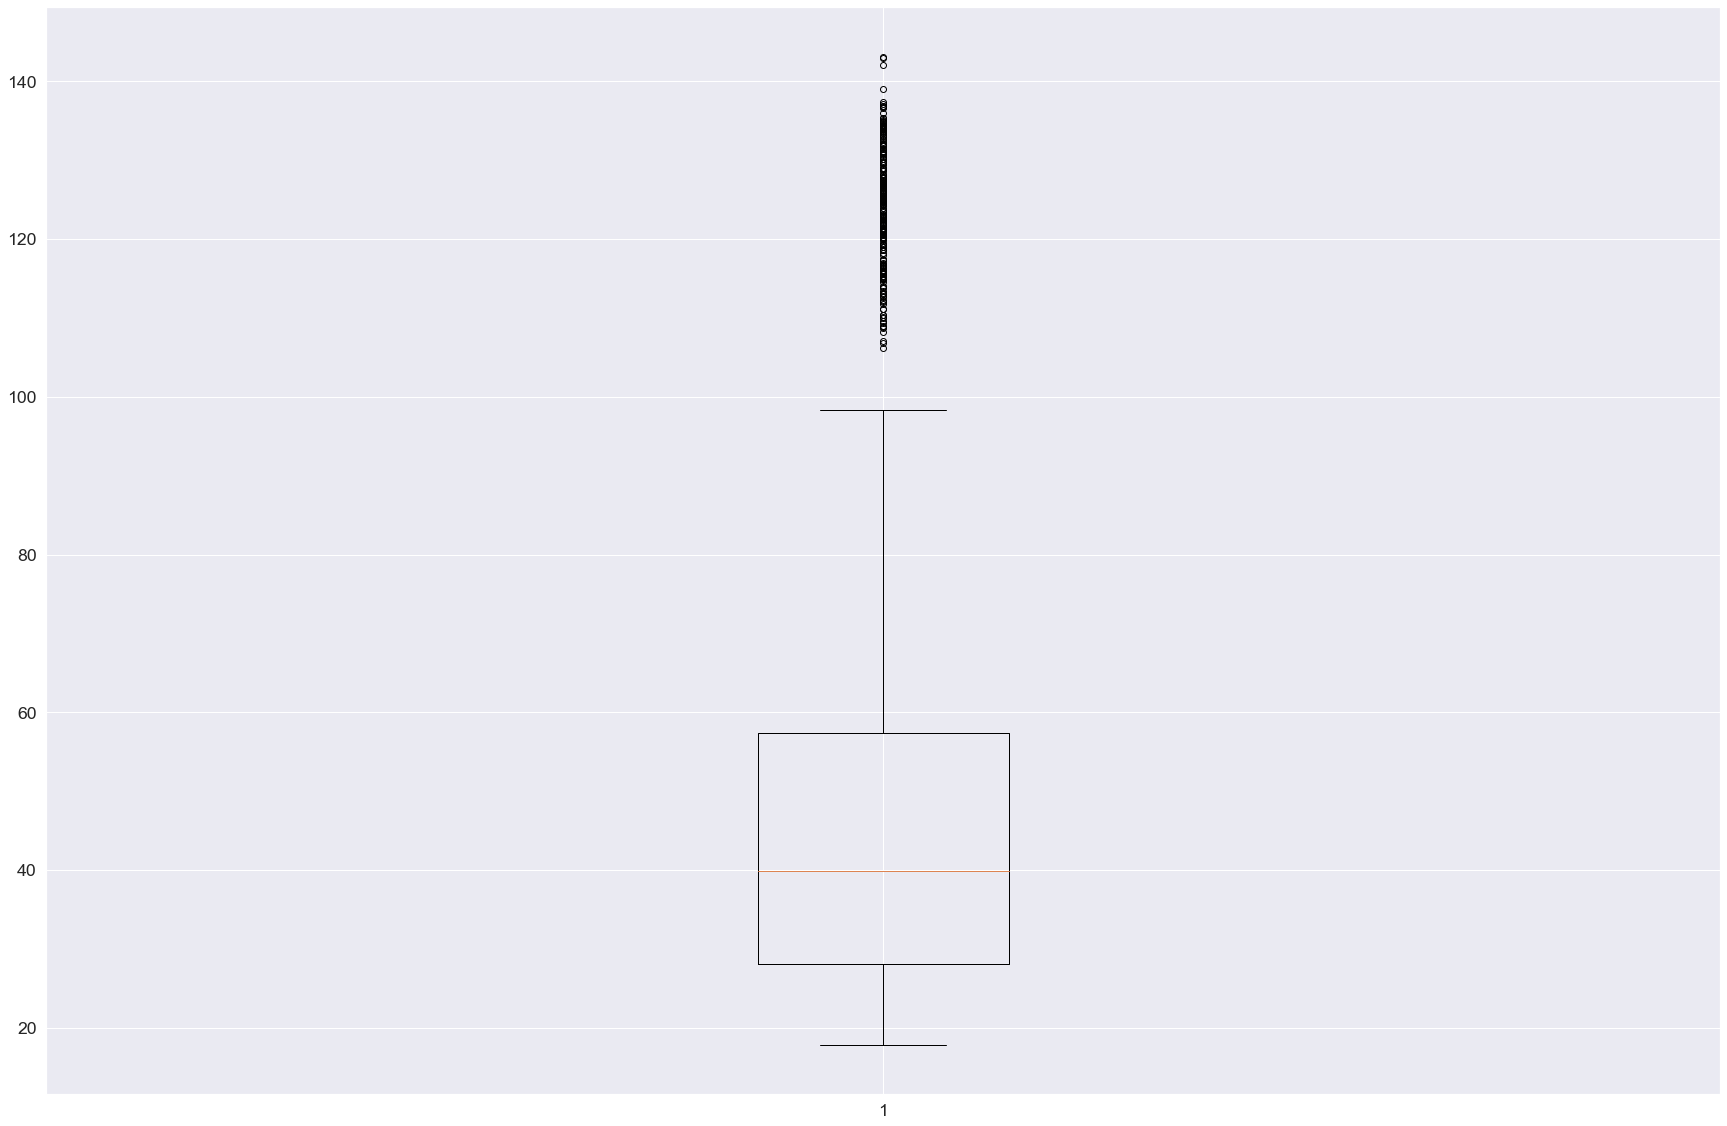

In [87]:

plt.boxplot(df_final['Close_apple'])

plt.show()

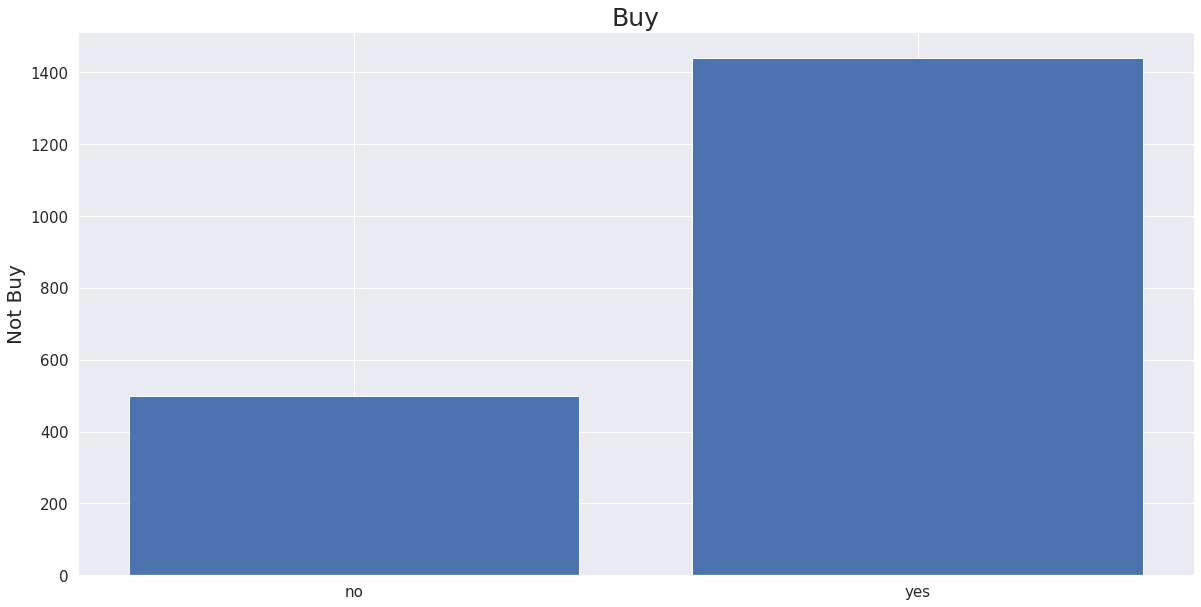

In [173]:
#7:  Barchartse
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 1)

# make the data read to feed into the visulizer
X_Canceled= df_final.replace({'Buy': {1: 'yes', 0: 'no'}}).groupby('Buy').size().reset_index(name='Counts')['Buy']
Y_Canceled = df_final.replace({'Buy': {1: 'yes', 0: 'no'}}).groupby('Buy').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes.bar(X_Canceled, Y_Canceled)
axes.set_title('Buy', fontsize=25)
axes.set_ylabel('Not Buy', fontsize=20)
axes.tick_params(axis='both', labelsize=15)



plt.show()

In [88]:
from sklearn.linear_model import LinearRegression

In [101]:
target = df_final.replace({'Buy': {1: 'Yes', 0: 'No'}})['Buy']

In [102]:
target.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Buy, dtype: object

In [92]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [93]:
df_model = df_final.drop(columns = ["Date", "rolling_mean", "Close_apple"])

In [94]:
df_model

,Year,Close_google,Close_disney,Close_microsoft,Close_samsung,Close_Oil,Close_gold,Buy
0,2014,554.481689,76.269997,37.160000,26180.0,95.14,1225.000000,1
1,2014,550.436829,76.110001,36.910000,25920.0,93.66,1238.400024,1
2,2014,556.573853,75.820000,36.130001,26140.0,93.12,1237.800049,1
3,2014,567.303589,76.339996,36.410000,26080.0,93.31,1229.400024,1
4,2014,568.484192,75.220001,35.759998,25820.0,91.90,1225.300049,1
...,...,...,...,...,...,...,...,...
1934,2020,2539.899902,178.350006,265.019989,68000.0,52.64,1776.599976,0
1935,2021,2539.899902,178.350006,265.019989,85000.0,52.64,1776.599976,0
1936,2021,2539.899902,178.350006,265.019989,84200.0,52.64,1776.599976,0
1937,2021,2539.899902,178.350006,265.019989,84800.0,52.64,1776.599976,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(df_model.loc[:, df_model.columns != 'Buy'], target, test_size=0.5, random_state=22)

In [104]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Random Forest

In [123]:

from sklearn.ensemble import RandomForestClassifier

In [124]:
random_f = RandomForestClassifier()
model = random_f.fit(X_train, y_train)

In [125]:
y_pred = model.predict(X_test)

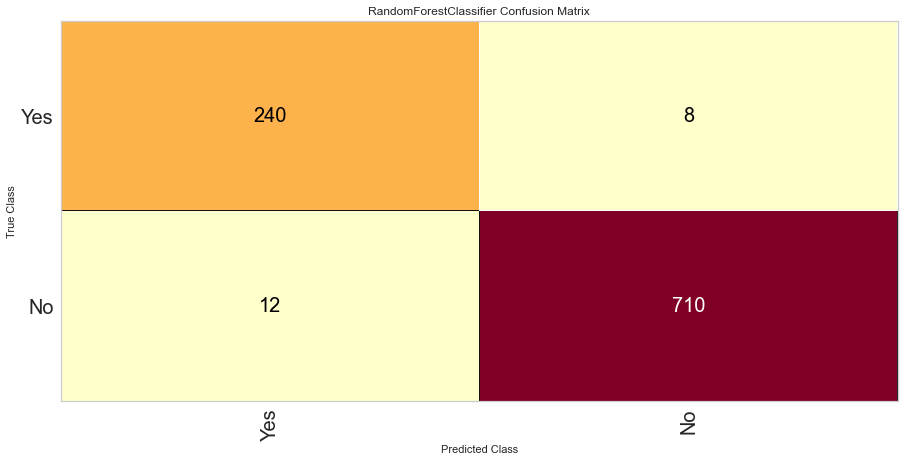

In [126]:

classes = ['Yes','No']
cm = ConfusionMatrix(model, classes=classes, percent=False)

cm.fit(X_train, y_train)

cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

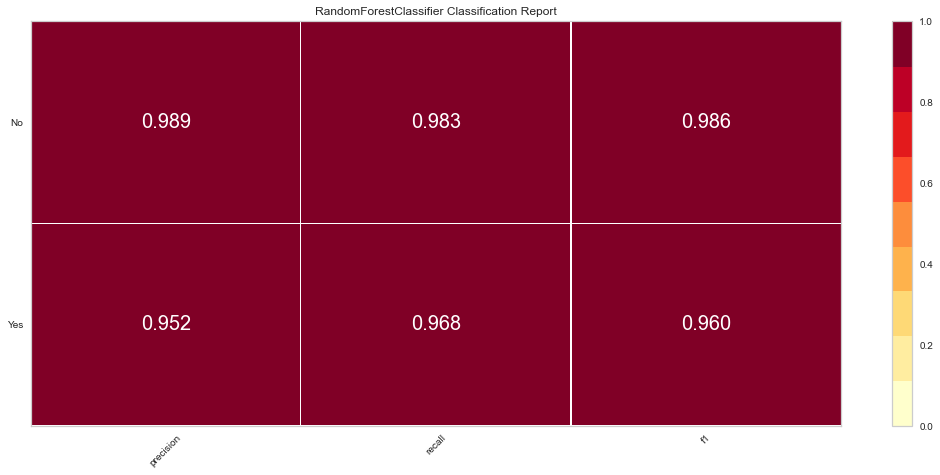

In [127]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()



In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [129]:

print("Accuracy for Random Forest Cassifier:",accuracy_score(y_test, y_pred))

Accuracy for Random Forest Cassifier: 0.979381443298969


# KNeighbors

In [130]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

from sklearn.neighbors import KNeighborsClassifier

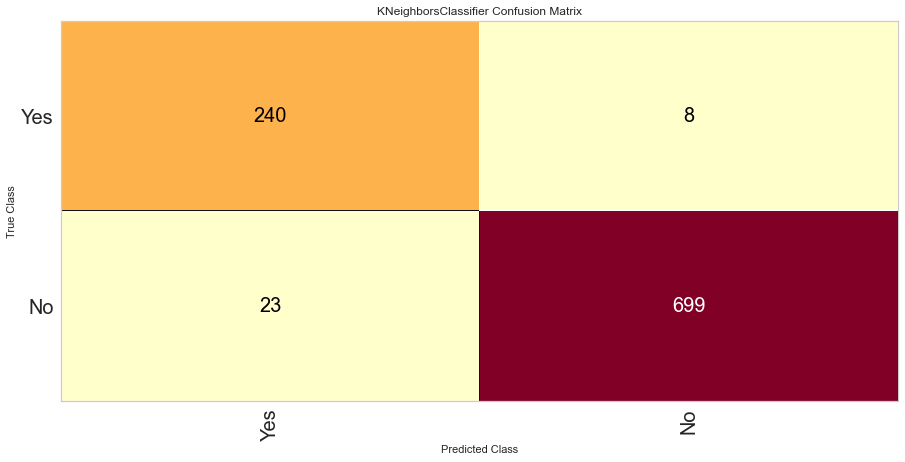

In [131]:
nearest_n = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)


#The ConfusionMatrix visualizer taxes a model
classes = ["Yes","No"]
cm = ConfusionMatrix(nearest_n, classes=classes, labels = classes, percent=False)


cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

In [132]:
y_pred = model.predict(X_test)

In [133]:
print("Accuracy for Kneughbors:",accuracy_score(y_test, y_pred))

Accuracy for Kneughbors: 0.979381443298969


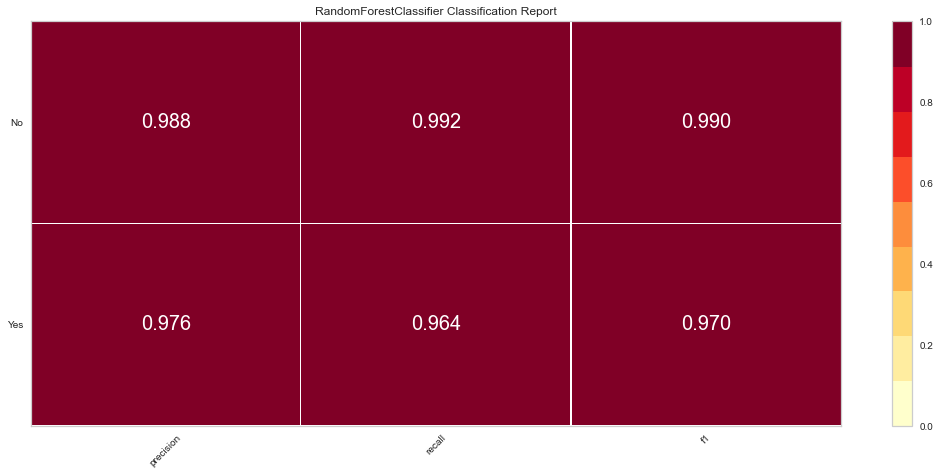

In [122]:

plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.score(X_test, y_test)  
g = visualizer.poof()

# Logistic regression

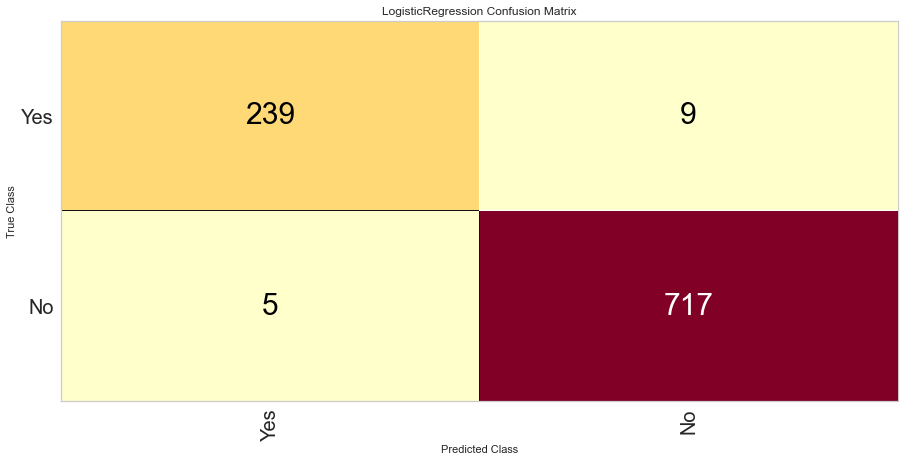

In [134]:
model = LogisticRegression()
classes = ["Yes","No"]
cm = ConfusionMatrix(model, classes=classes, percent=False, labels = [1, 0])

cm.fit(X_train, y_train)

cm.score(X_test, y_test)

for label in cm.ax.texts:
    label.set_size(30)

cm.poof()

In [135]:
y_pred = model.predict(X_test)

In [136]:
print("Accuracy for Logistic regression:",accuracy_score(y_test, y_pred))

Accuracy for Logistic regression: 0.9855670103092784


# Predicting Price of the Stock Using Linear regression

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
df_model_L = df_final.drop(columns = ["Date", "rolling_mean", "Buy"])

In [145]:
df_model_L.head()

,Year,Close_apple,Close_google,Close_disney,Close_microsoft,Close_samsung,Close_Oil,Close_gold
0,2014,19.754642,554.481689,76.269997,37.160000,26180.0,95.14,1225.000000
1,2014,19.320715,550.436829,76.110001,36.910000,25920.0,93.66,1238.400024
2,2014,19.426071,556.573853,75.820000,36.130001,26140.0,93.12,1237.800049
3,2014,19.287144,567.303589,76.339996,36.410000,26080.0,93.31,1229.400024
4,2014,19.409286,568.484192,75.220001,35.759998,25820.0,91.90,1225.300049


In [146]:
target = df_model_L["Close_apple"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df_model_L.loc[:, df_model_L.columns != 'Close_apple'], target, test_size=0.5, random_state=22)

In [148]:
model = LinearRegression().fit(X_train, y_train)

In [149]:
y_pred = model.predict(X_test)

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.919973133612361
Mean Squared Error: 25.375839022592544
Root Mean Squared Error: 5.037443699198289


In [155]:
Intercept=model.intercept_
Coefficients=model.coef_

In [156]:
Intercept

13732.321132334717

In [157]:
Coefficients

array([-6.83179898e+00, -6.63660065e-03,  1.24898560e-01,  4.97961169e-01,
        6.56055222e-04, -1.47141841e-01,  1.59471101e-02])

Text(0.5, 1.0, 'Actua Values Vs. Predicted Values')

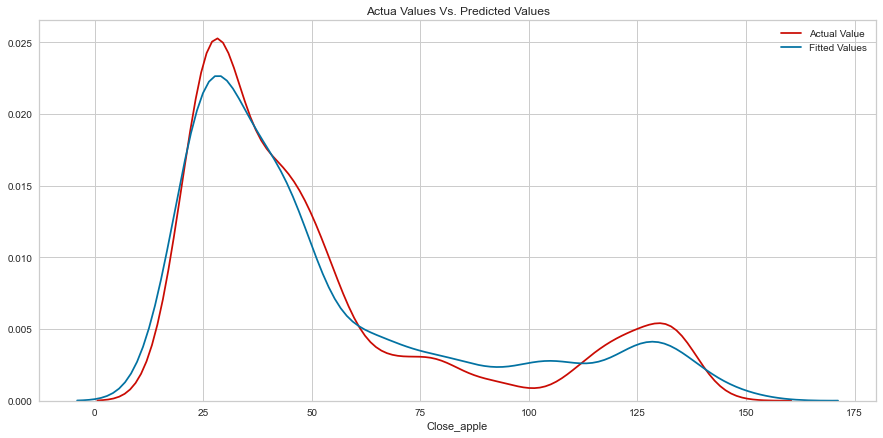

In [159]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title("Actua Values Vs. Predicted Values")